## 1. Abyssal Recipes (50 pts)
Munk's 1966 Abyssal Recipes is a balance between vertical heat advection and the vertical diffusion of heat from the surface down into the ocean interior:
\begin{equation}
    w\frac{\partial T}{\partial z} = \frac{\partial}{\partial z}\left(\kappa_v\frac{\partial T}{\partial z}\right).
\end{equation}
### Part 1 (25 pts)
1. Make an estimate of the sign and magnitude of the vertical velocity ($w$) in units of **cm day$^{-1}$** if the vertical temperature profile is exponential: $\displaystyle T(z) = T_o e^{z/h_T}$ where $T_o$ is the surface temperature and the depth scale ($h_T$) is 1000 m.
2. Give an explanation for why a linear vertical temperature profile invalidates this model.  

### Part 2 (25 pts)
1. Make an estimate of the vertical upwelling velocity ($w$) in units of **cm day$^{-1}$** using volume conservation if there is a deep water source in the Arctic ($S_1$) of 18 Sv and a deep water source in the Antarctic ($S_2$) of 13 Sv.  The average volume ($\forall$) of the ocean is 1.335$\times$10$^{9}$ km$^3$.
2. Compare your result with **Part 1** and discuss any limitations of the Munk 1966 result. 
3. How does this upwelling velocity compare with typical values for Ekman pumping (Subtropical gyres) and suction (Subpolar gyres) values?  **Hint:**  Use the wind stress curl map from lecture. 


In [1]:
# Import Modules
import numpy as np
import matplotlib.pyplot as plt

### Part 1, problem 1
Assume: A constant vertical eddy diffusivity of $\kappa_v = 10^{-4}$ m$^2$ s$^{-1}$

$\partial T/\partial z = T_o/h_Te^{z/h_T}$, $\partial^2 T/\partial z^2 = T_o/h^2_Te^{z/h_T}$

$w\frac{\partial T}{\partial z} = \frac{\partial}{\partial z}\left(\kappa_v\frac{\partial T}{\partial z}\right) \rightarrow w\frac{\partial T}{\partial z} = \kappa_v\frac{\partial^2 T}{\partial z^2}$

$wT_o/h_Te^{z/h_T} = \kappa_vT_o/h^2_Te^{z/h_T} \rightarrow w = \kappa_v/h_T$

Text(0, 0.5, 'z [m]')

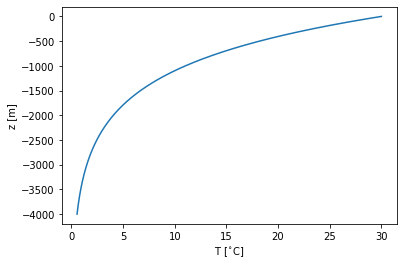

In [2]:
To = 30.  # C
h_T = 1.e3
kappa_v = 1.e-4  # m^2 s^-1
z = np.arange(-4000, 1)
T = To*np.exp(z/h_T)

plt.plot(T, z)
plt.xlabel('T [$^{\circ}$C]')
plt.ylabel('z [m]')

I chose a surface temperature of 30$^{\circ}$C since Munk picked a tropical temperature profile in the warm pool.

In [3]:
w = kappa_v/h_T*1.e2*86400. # cm day^-1
f'w = {round(w, 2)} cm/day'

'w = 0.86 cm/day'

### Part 1, problem 2

A linear temperature profile mathematically invalidates this model because there would be no vertical flux divergence of heat.

The relation in equation 1 is a parameterization for mixing in the interior by eddies, hence the name for the diffusivity as an eddy diffusivity.  The true relation should look like this:

$w\frac{\partial T}{\partial z} = -\frac{\partial\overline{w^{\prime}T^{\prime}}}{\partial z}$, where primes are anomalies (eddy quantities) and the overbar is an average (time in this case).  This relation says that a convergence of heat is associated with positive temperature advection.

Eddies are acting to smooth out temperature gradients.  With a positive vertical temperature gradient eddies bring warm water down and cool water up which means when warm water is brought down $w^{\prime}<0$ and $T^{\prime}>0$ so that $w^{\prime}T^{\prime} < 0$.  The same is true for water being brought up, $w^{\prime}T^{\prime} < 0$ .  The eddy process is likely breaking over internal waves or Kelvin-Helmholtz instability at density interfaces in the ocean interior.  The vertical eddy temperature flux is parameterized as downgradient so that movement of heat is from hot to cold.

$\overline{w^{\prime}T^{\prime}} = -\kappa_v\frac{\partial T}{\partial z}$

For a control volume in the ocean interior, if the flux into the control volume at the top is the same as the flux out at the bottom then there is no convergence or divergence of heat into the control volume.  A linear temperature profile leads to no flux divergence, meaning the flux into the box at the top is the same out of the box at the bottom.  In order to have a flux divergence or convergence we need the heat flux into the box to be greater than what leaves.  This is achieved only with a nonlinear temperature profile.

### Part 2, problem 1
Since volume is conserved the source of deep water formation in the high latitudes to the deep sub-thermocline must be balanced by upwelling.  If we assume that this upwelling velocity is uniform thorughout the world's oceans you can set the source of deep water volume transport equal to the vertical velocity times the surface area of the ocean.

$S = S_1 + S_2 = wA$

$\forall = AH$ where $H$ is the average depth of the ocean at 4000 m.

$w = \frac{SH}{\forall} = \frac{[(18+13)x10^6~\mbox{m}^3/\mbox{s}](4000~\mbox{m})}{1.335x10^9~\mbox{km}^3(10^3~\mbox{m})^3/\mbox{km}^3)}(86400~\mbox{s}/\mbox{day})(10^2~\mbox{cm}/\mbox{m}) = 0.8$  cm/day

In [4]:
S = (18+13)*1.e6  # m^3/s
H = 4.e3 # m
V = 1.335e9 # km^3

w = S*H/V*86400*1.e2/(1.e9)
f'w = {round(w, 2)} cm/day'

'w = 0.8 cm/day'

### Part 2, problem 2
The value of the vertical velocity is very similar to the value in **Part 1**.  Some limitations of the Munk model is that ocean bottom is not flat, which results in eddy diffusivities that are not uniform in the ocean interior.  They can be orders of magnitude larger near steep topography where internal tides are generated and break.  This would mean that the upwelling velocity over the globe is not uniform.

### Part 2, problem 3

If we compare values of the upwelling velocity with that due to the Ekman pumping (subtropical gyres) and suction (subpolar gyres):
\begin{equation}
w_E = \frac{\mbox{curl}_z(\tau)}{\rho f}
\end{equation}

we can use a value of -2x10$^{-7}$ N m$^{-3}$ at 30$^{\circ}$N and 2x10$^{-7}$ N m$^{-3}$ at 60$^{\circ}$N. 

In [5]:
curl_tau = 2.e-7  # N m^-3
f_sp = 2.*7.29e-5*np.sin(60.*np.pi/180.)  # s^-1
f_st = 2.*7.29e-5*np.sin(30.*np.pi/180.)  # s^-1
rho = 1025. # kg m^-3

w_E_sp = curl_tau/(rho*f_sp)*1.e2*86400. # cm/day
w_E_st = -curl_tau/(rho*f_st)*1.e2*86400. # cm/day

f'w = {round(w_E_sp, 2)} cm/day in the subpolar N. Atlantic and {round(w_E_st, 2)} cm/day in the subtropical N. Atlantic.'

'w = 13.35 cm/day in the subpolar N. Atlantic and -23.13 cm/day in the subtropical N. Atlantic.'

The Ekman vertical velocity at the base of the Ekman (wind-driven mixed layer) is 10 to 20 times larger than the vertical upwelling velocity from deep water formation.  This makes it very difficult to measure the overturning ciruclation.